# Course Project | TTDS | 23-24 
### By Mr.Waqas (DS-019) & Mr Emmad (DS-005)

# Cardiopulse Guardian: A Machine Learning Model for Cardiovascular Risk Detection and Management

## Introduction

Cardiovascular diseases (CVDs) are a leading cause of global mortality, accounting for approximately 17.9 million deaths annually. To address this critical issue, we present the Cardiopulse Guardian, a machine learning model designed for the early detection and management of individuals at high cardiovascular risk.

## Background

### Cardiovascular Diseases (CVDs) Statistics

- CVDs contribute to 31% of all deaths worldwide.
- Four out of 5 CVD deaths result from heart attacks and strokes.
- One-third of these deaths occur prematurely in individuals under 70 years of age.

### Dataset Information

The dataset used for training the Cardiopulse Guardian contains 11 features that can be utilized to predict the likelihood of heart disease. Link to datset https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final


These features include...

**Age**: age of the patient [years]

**Sex**: sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: resting blood pressure [mm Hg]

**Cholesterol**: serum cholesterol [mm/dl]

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease**: output class [1: heart disease, 0: Normal]

Our target is to predict **HeartDisease** based on Dataset provided.


### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

#### Step 1: Data Acquisition 

In [2]:
df = pd.read_csv('heart_data.csv')

#### Understanding the data
- shape of the data
- checking column dtypes
- checking is there any null value

In [3]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-" + "\n")
    print(dataframe.info())
    
    print(20*"-" + "Data Shape".center(20) + 20*"-" + "\n")
    print(dataframe.shape)
    
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-" + "\n")
    print(dataframe.head())
    
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-" + "\n")
    print(dataframe.tail())
    
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-" + "\n")
    print(dataframe.isnull().sum())
    
    print("\n" + 20 * "-" + "Describe the Data".center(20) + 20 * "-" + "\n")
    print(dataframe.describe([0.01, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
--------------------     Data Shape     --------------------

(918, 12)

--------------------  The First 5 Data  --------------------



This output provides a comprehensive summary of descriptive statistics for each numerical column in our dataset. Let's break down the information presented:

1. **Age:**
   - The ages range from 28 to 77, with a mean age of approximately 53.5.
   - The 99th percentile indicates that only 1% of the individuals have an age higher than 74.

2. **RestingBP (Resting Blood Pressure):**
   - The resting blood pressure varies from 0 to 200, with a mean of approximately 132.4.
   - The 99th percentile shows that only 1% of the individuals have a resting blood pressure higher than 180.

3. **Cholesterol:**
   - Cholesterol levels range from 0 to 603, with a mean of approximately 198.8.
   - The 99th percentile indicates that only 1% of the individuals have cholesterol levels higher than 411.49.

4. **FastingBS (Fasting Blood Sugar):**
   - This appears to be a binary variable (0 or 1), possibly indicating normal (0) or elevated (1) fasting blood sugar.
   - About 23.3% of the individuals have elevated fasting blood sugar (mean is 0.23).

5. **MaxHR (Maximum Heart Rate):**
   - Maximum heart rates range from 60 to 202, with a mean of approximately 136.8.
   - The 99th percentile shows that only 1% of the individuals have a maximum heart rate higher than 186.

6. **Oldpeak:**
   - Oldpeak values range from -2.6 to 6.2, with a mean of approximately 0.89.
   - The 99th percentile indicates that only 1% of the individuals have an oldpeak value higher than 4.

7. **HeartDisease:**
   - This seems to be a binary variable (0 or 1) indicating the presence (1) or absence (0) of heart disease.
   - About 55.3% of the individuals have heart disease on average.


#### Displaying Categorical and Numerical Features
Identify and categorize features into numerical and categorical for further analysis.


In [4]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
print('There are',len(numeric_features),'numerical features and ',len(categorical_features),'categorical features shown below:')
print('\nNumerical Features:',numeric_features)
print('Categorical Features:',categorical_features)

There are 5 numerical features and  6 categorical features shown below:

Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical Features: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Conclusion:
There are 7 numerical and 5 categorical variables in this dataset.
918 observations, 12 variable available(1 dependent)
Under normal circumstances, it seems that there are no missing valuesin the data set, but there may be missing values hidden in the data of the variables here.

#### Step 2 : Data Cleaning and Prep 
- Fix missing values (Imputation can be considered)
- Remove duplicate values (where needed)
- Check Data Types beforehand 

Performing data cleaning to get the data ready for the next step.

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(918, 12)

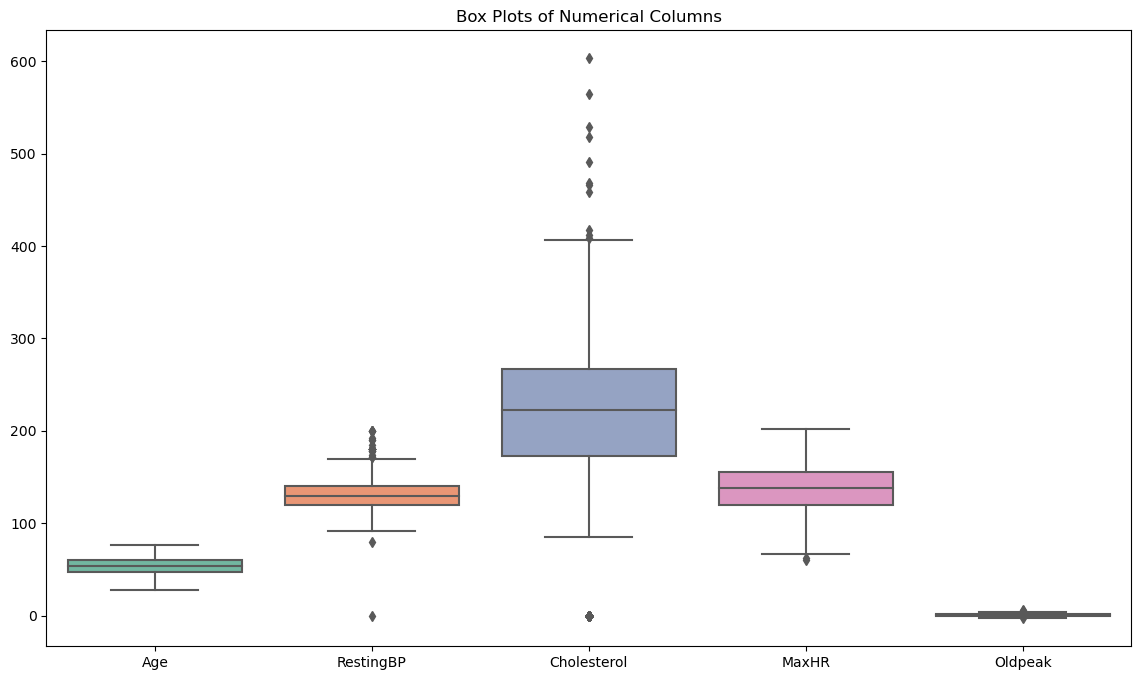

In [6]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Specify the columns for which we want to visualize outliers
selected_columns= ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create box plots for each numerical column
sns.boxplot(data=df[selected_columns], orient='v', palette='Set2')

# Add a title to the plot
plt.title('Box Plots of Numerical Columns')

# Display the plot
plt.show()

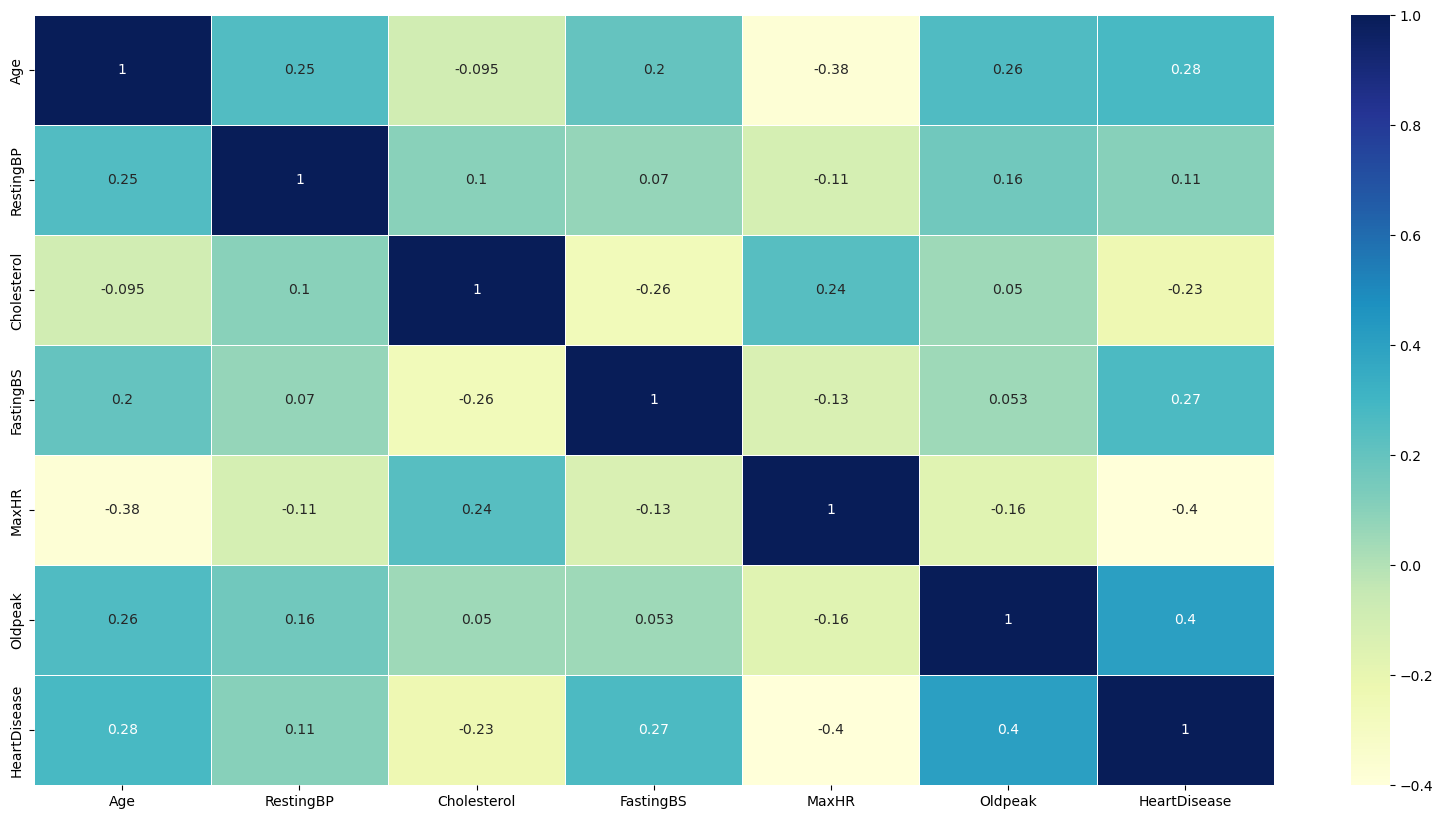

In [7]:
fig, ax = plt.subplots(figsize=(20,10)) # maximizing the size of graph
ax = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax)

### Attention:
**I have check datatypes and count null values earlier and found that there were no missing values in data. However there may be 0 value in numerical columns such as in ["Age","RestingBP","Cholesterol","MaxHR"], which is also a null value with reference to practical ranges of each coulumn. Therefore I have replace 0 with NaN and count null values and found 3 columns have null values. I have imputed values in these columns using .**

In [8]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)
dimension_variable = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
df[dimension_variable] = df[dimension_variable].replace(0,np.NaN)

In [9]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease        0
dtype: int64

In [10]:
median_resting_bp=df['RestingBP'].median()
df['RestingBP']=df['RestingBP'].fillna(median_resting_bp)

# Instantiate KNNImputer with k=5 (you can adjust k based on your needs)
knn_imputer = KNNImputer(n_neighbors=10)

# Impute missing values in 'Cholesterol' directly in the original DataFrame
df['Cholesterol'] = knn_imputer.fit_transform(df[['Cholesterol']])

# Impute missing values in 'Oldpeak' directly in the original DataFrame
df['Oldpeak'] = knn_imputer.fit_transform(df[['Oldpeak']])

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Step 3 : EDA & Distributions

Your Dataset Specific Instructions for EDA

Include Distribution Plots and Historgrams vs Target Variable

## Target Variable

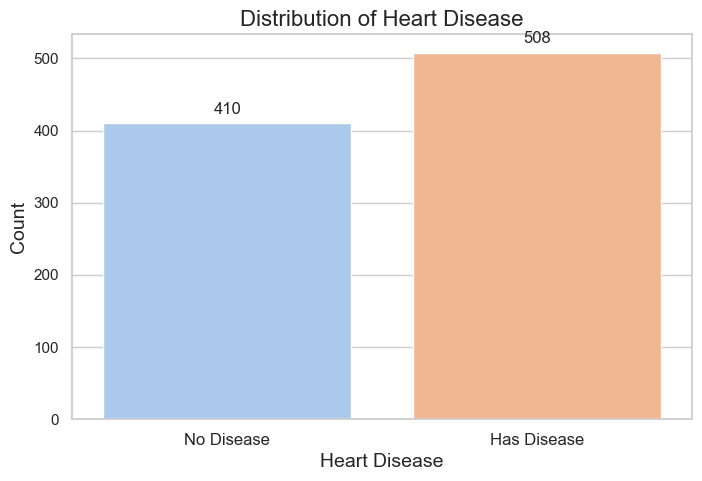

In [12]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")  # Set the background style
# Customize colors for the plot
colors = sns.color_palette("pastel")
# Create the count plot
ax = sns.countplot(x='HeartDisease', data=df, palette=colors)
# Add labels and title
ax.set_title('Distribution of Heart Disease', fontsize=16)
ax.set_xlabel('Heart Disease', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
# Customize the tick labels
ax.set_xticklabels(['No Disease', 'Has Disease'], fontsize=12)
# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
# Display the plot
plt.show()

## Numerical Feature

In [13]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")
    
for col in numeric_features:
    target_summary_with_num(df,"HeartDisease",col)

                    Age
HeartDisease           
0             50.551220
1             55.899606

###################################
               RestingBP
HeartDisease            
0             130.180488
1             134.440945

###################################
              Cholesterol
HeartDisease             
0              239.055385
1              249.138935

###################################
                   MaxHR
HeartDisease            
0             148.151220
1             127.655512

###################################
               Oldpeak
HeartDisease          
0             1.289478
1             1.635739

###################################


#### KDE Plot | Pairwise Relationship & Distributions
**A pairwise scatter plot matrix with KDE plots on the diagonal. This visualization help exploring relationships between numerical variables and understanding the distribution of each variable with respect to the target variable 'HeartDisease.**

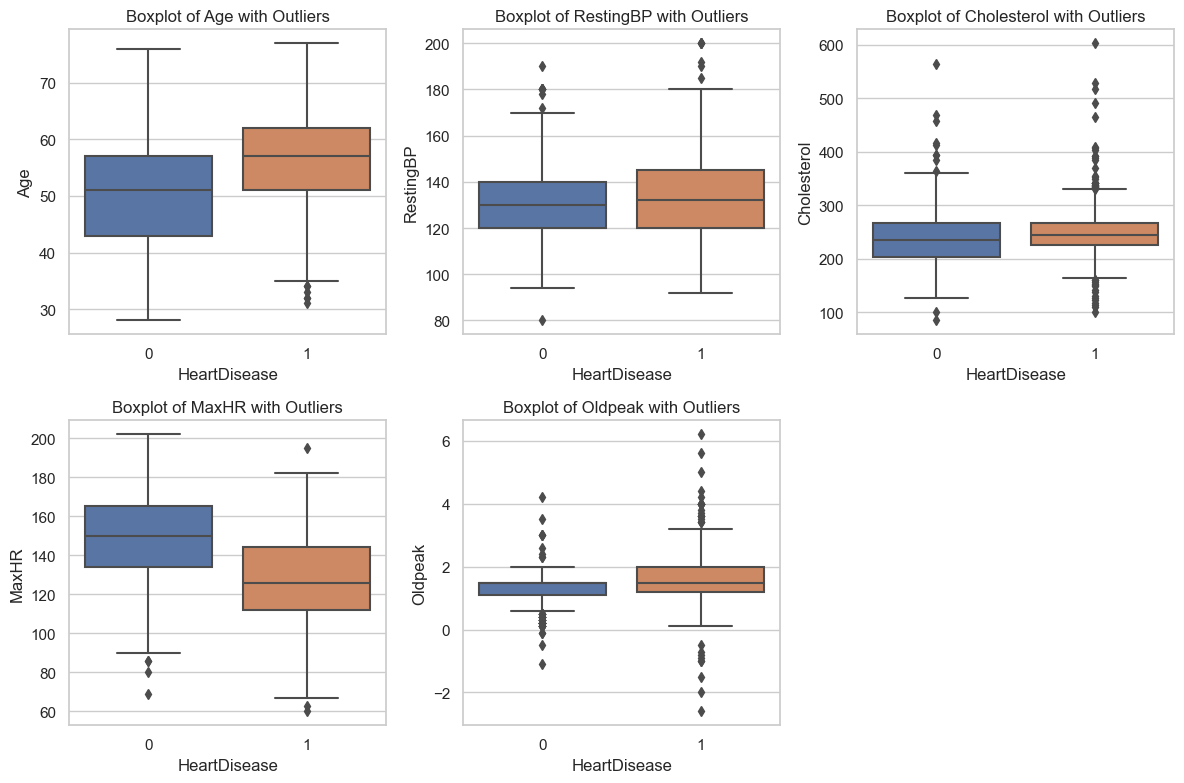

In [14]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=feature, data=df, showfliers=True)
#     sns.stripplot(x='HeartDisease', y=feature, data=df, color='red', jitter=0.2, size=2.5)
    plt.title(f'Boxplot of {feature} with Outliers')
plt.tight_layout()
plt.show()

In [15]:
# Identify outliers based on IQR for each numerical feature
outlier_indices = set()
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier indices
    outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outlier_indices.update(df[outliers].index)

In [16]:
# Will drop rows with at least one outlier in any numerical feature
df_cleaned = df.drop(outlier_indices)

In [17]:
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (918, 12)
Cleaned dataset shape: (582, 12)


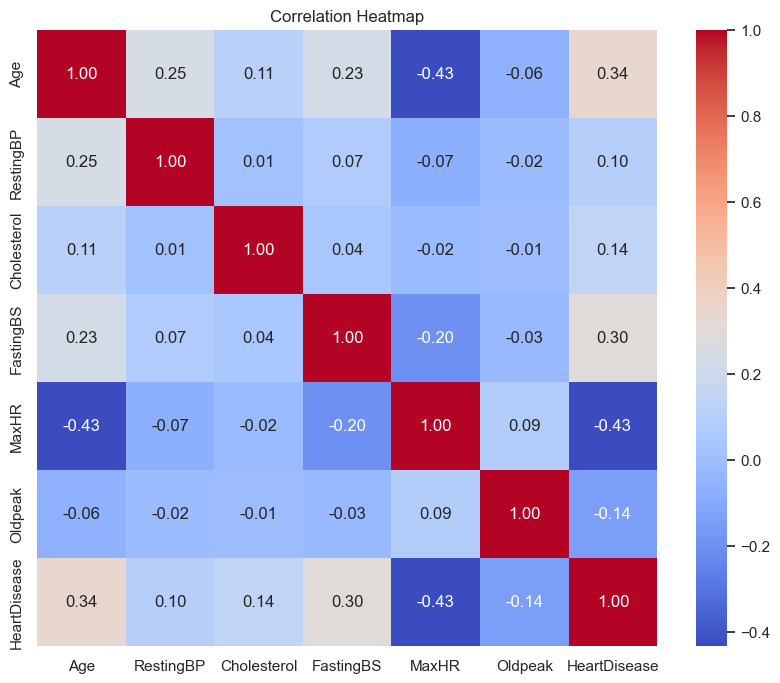

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Comment: No Improvement in Correlation Matrix after Outlier Removal

#### Explanation: 
Despite removing outliers based on our criteria, the correlation matrix did not show significant improvement. 
Given the small size of our dataset, compromising model effectiveness due to outlier removal is a concern.
Therefore, we opt to include the full dataset in the subsequent steps to ensure a more comprehensive analysis.

#### Next Steps: Proceed with Full Dataset

#### Explanation: We will continue the analysis and modeling using the entire dataset to maintain a robust representation of the data.
This decision aims to prevent potential information loss and better capture the underlying patterns in the dataset, 
especially considering the limited size of our data.


## Pairwise Relationships & Distribution

<Figure size 1200x800 with 0 Axes>

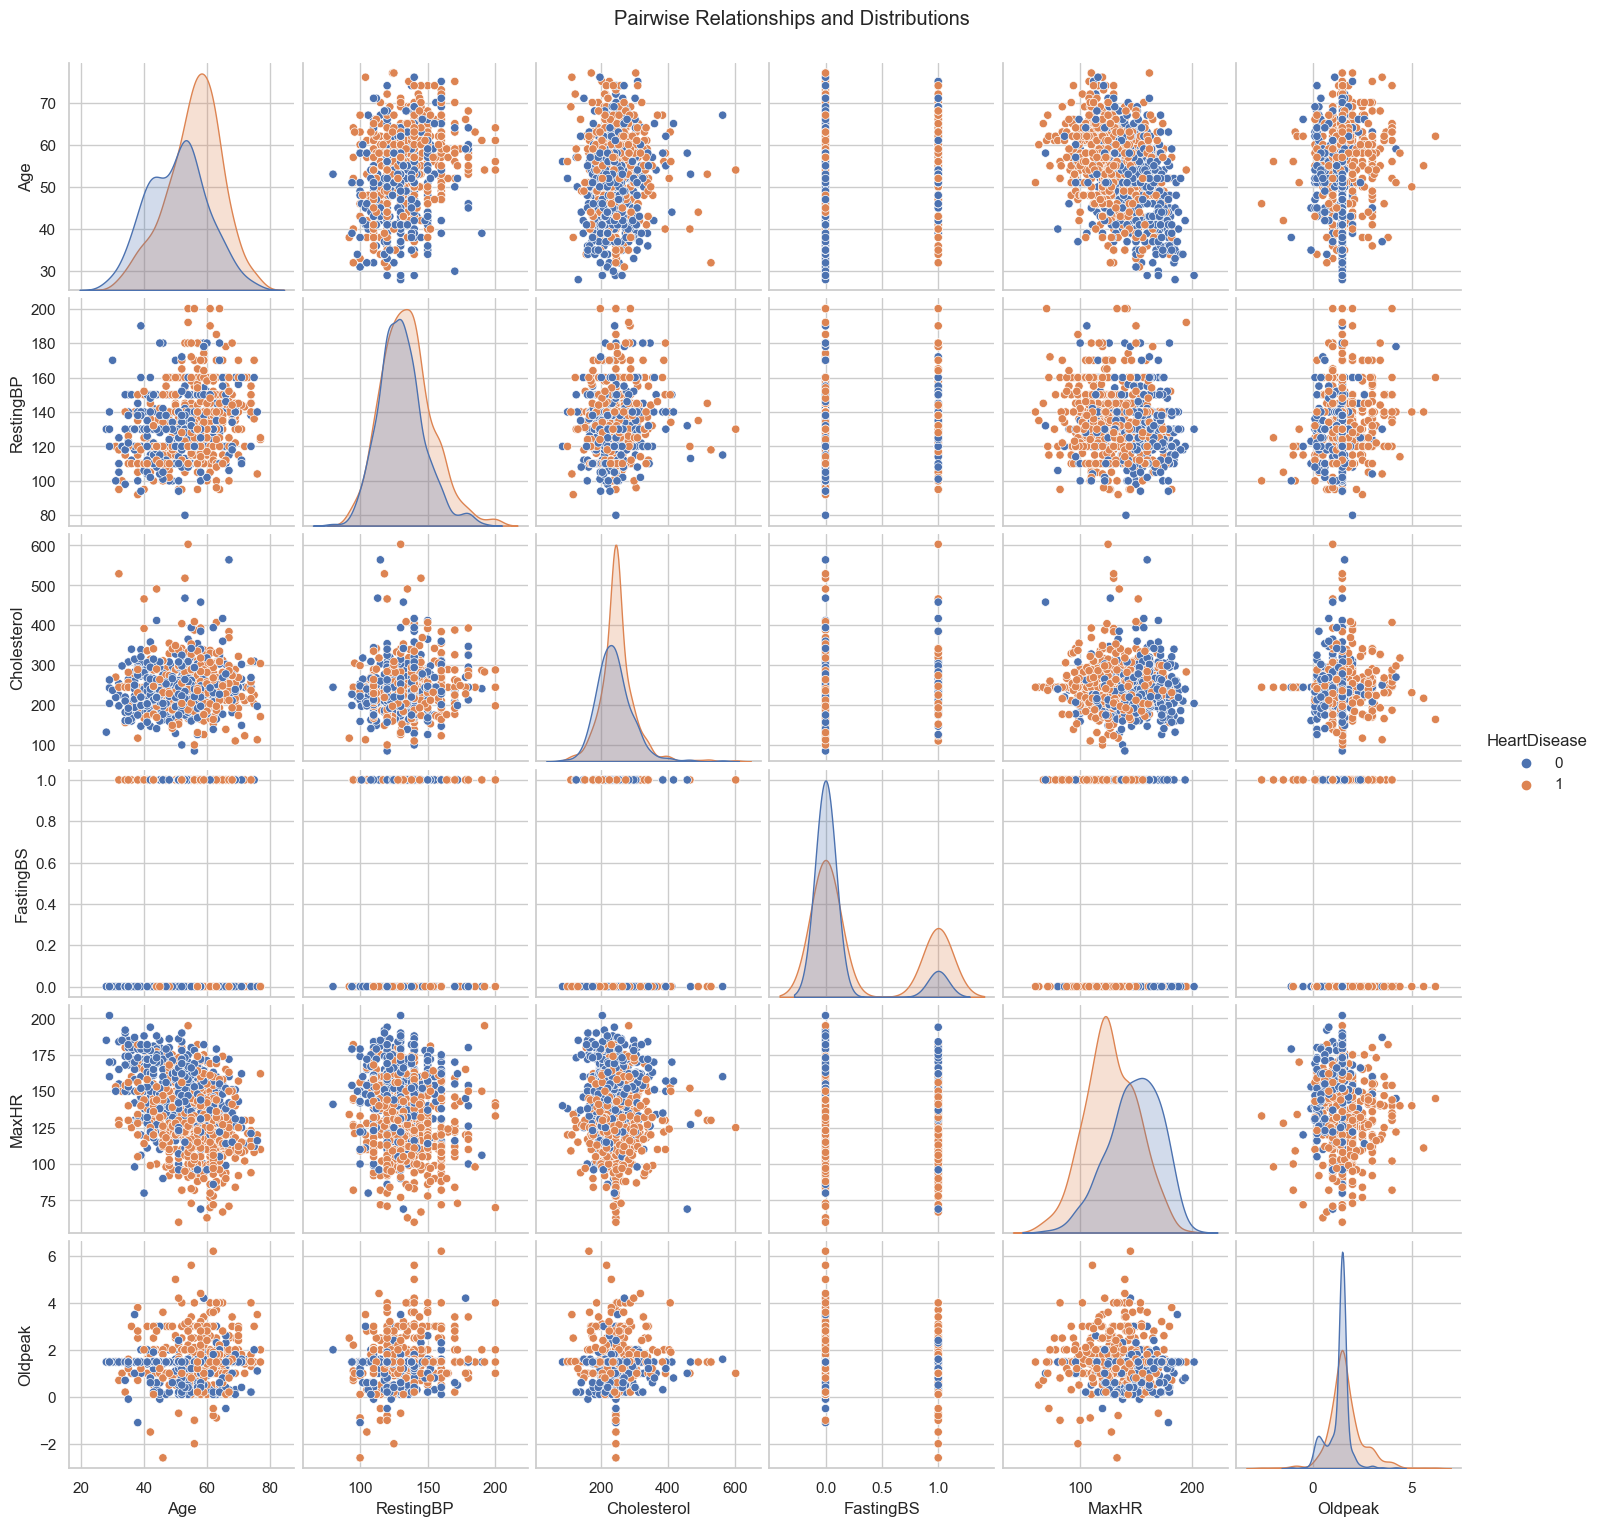

In [19]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='HeartDisease', diag_kind='kde')
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

## Step 4 : Features & Preparation

## Analysing Numerical Feature

## 1. Exploring Age Groups and Cardiovascular Risk
Investigate the impact of age on cardiovascular risk by categorizing individuals into different age groups. Analyze age distributions, prevalence of cardiovascular risk factors, and correlations with other health indicators to gain insights into how age influences the likelihood of heart disease in the dataset.

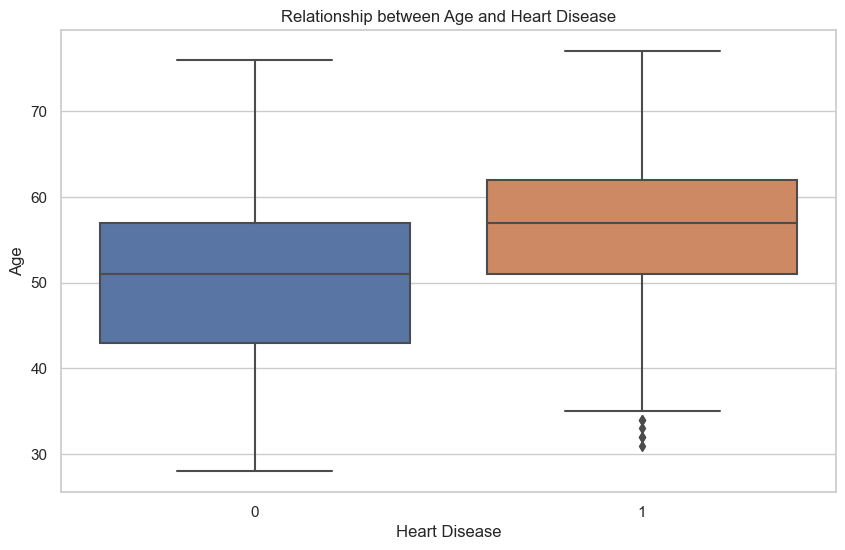

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Relationship between Age and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

Middle age people(age between 45 to 65) will have higher incidence of cardiovascular disease on average the HeartDisease outcome

In [21]:
df['HighRiskAge'] = (df['Age'] >= 45).astype(int)

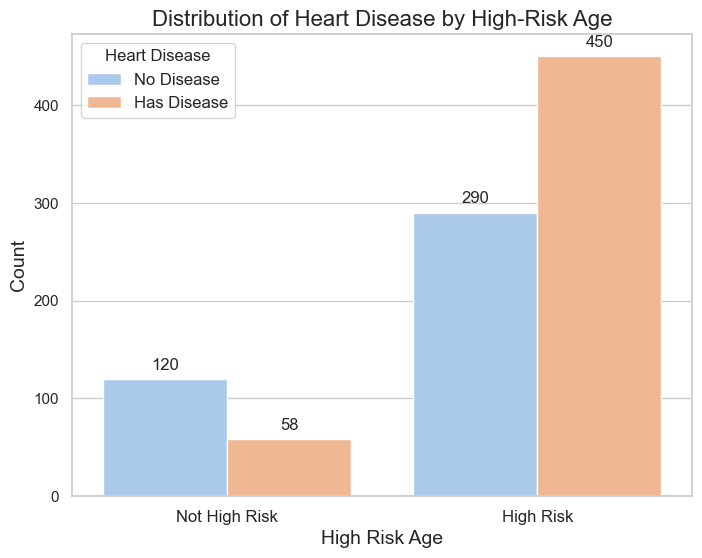

In [22]:
# Set the style for better aesthetics
sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HighRiskAge', hue='HeartDisease', data=df, palette="pastel")
# Add labels and title
ax.set_title('Distribution of Heart Disease by High-Risk Age', fontsize=16)
ax.set_xlabel('High Risk Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
# Customize the tick labels
ax.set_xticklabels(['Not High Risk', 'High Risk'], fontsize=12)
ax.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'], fontsize=12)
# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
# Show the plot
plt.show()


## 2. Distribution of HeartDisease by Gender

In [23]:
# Assuming 1 represents heart disease and 0 represents normal
heart_disease_counts = df[df['HeartDisease'] == 1]['Sex'].value_counts()
total_counts = df['Sex'].value_counts()

# Calculate the percentages
percentage_heart_disease_male = (heart_disease_counts['M'] / total_counts['M']) * 100
percentage_heart_disease_female = (heart_disease_counts['F'] / total_counts['F']) * 100

# Print the results
print("Sex Counts:")
print(total_counts.to_string(index=True, header=False))

print(f"Percentage of males with heart disease: {percentage_heart_disease_male:.2f}%")
print(f"Percentage of females with heart disease: {percentage_heart_disease_female:.2f}%")


Sex Counts:
M    725
F    193
Percentage of males with heart disease: 63.17%
Percentage of females with heart disease: 25.91%


<Figure size 1000x600 with 0 Axes>

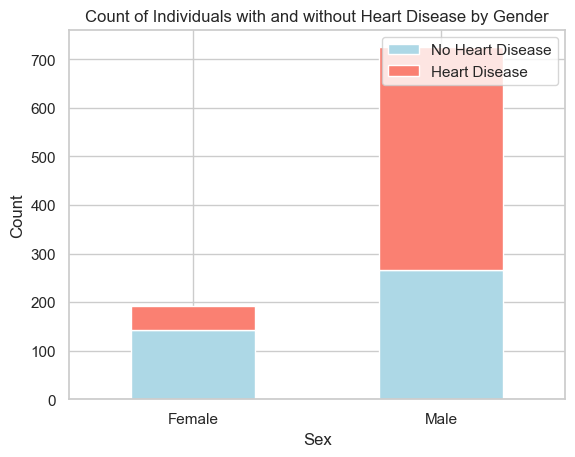

In [24]:
# Create a new DataFrame for plotting
plot_data = df.groupby(['Sex', 'HeartDisease']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Count of Individuals with and without Heart Disease by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')

# Show the plot
plt.show()


In [25]:
# Using label encoding
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Sex']

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64

### Insight: Disproportionate Heart Disease Incidence in Males

Despite a substantial representation of males in the dataset, the observed percentage of individuals with heart disease among males remains high. 

This suggests a potential gender-related pattern in heart disease incidence, warranting further investigation and consideration in the overall analysis.


## 3. Analyzing Relationship between Cholesterol level and Age

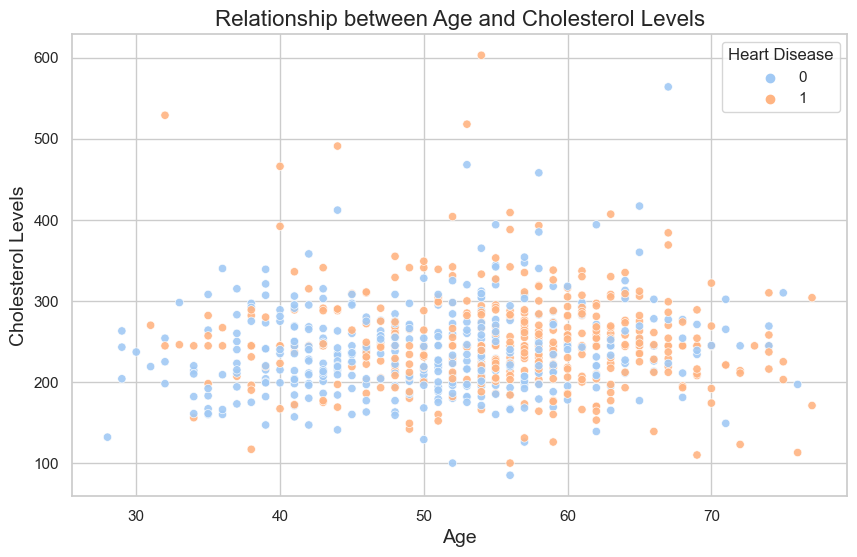

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot of Age vs. Cholesterol with color differentiation by heart disease status
sns.scatterplot(x='Age', y='Cholesterol', hue='HeartDisease', data=df, palette='pastel', alpha=0.9)

# Customize plot labels and title
plt.title('Relationship between Age and Cholesterol Levels', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cholesterol Levels', fontsize=14)

# Show a legend
plt.legend(title='Heart Disease', loc='upper right')

# Display the plot
plt.show()


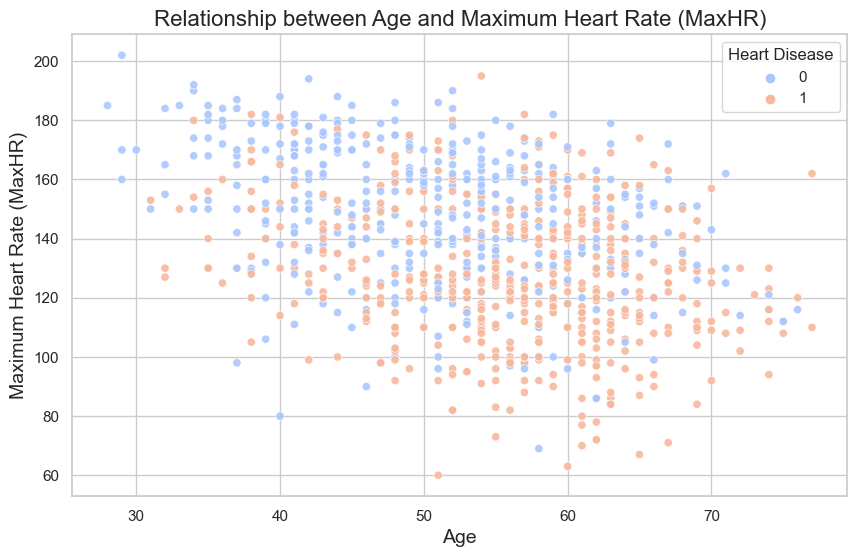

In [27]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot of Age vs. MaxHR with color differentiation by heart disease status
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df, palette='coolwarm', alpha=0.9)

# Customize plot labels and title
plt.title('Relationship between Age and Maximum Heart Rate (MaxHR)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Maximum Heart Rate (MaxHR)', fontsize=14)

# Show a legend
plt.legend(title='Heart Disease', loc='upper right')

# Display the plot
plt.show()


### Insights 
Age vs. Cholesterol Levels:

The scatter plot reveals a varied distribution of cholesterol levels across different age groups.
Individuals with heart disease tend to exhibit a diverse range of cholesterol levels, suggesting that cholesterol alone may not be a decisive factor in cardiovascular risk.


Age vs. Maximum Heart Rate (MaxHR):

The scatter plot illustrates the relationship between age and maximum heart rate (MaxHR) for individuals with and without heart disease.
There seems to be a subtle negative correlation, with older individuals generally showing a lower maximum heart rate, particularly among those with heart disease.
The distribution of MaxHR varies significantly, emphasizing the need for further investigation into factors influencing cardiovascular fitness with age.

### 2. Analyzing Resting Blood Pressure
Explore the distribution and impact of resting blood pressure on cardiovascular health. Investigate statistical measures, visualize the relationship between blood pressure and heart disease, and identify patterns that may contribute to risk assessment.

In [28]:
#Categorizing Resting Blood Pressure

# Define the bin edges based on blood pressure categories
bin_edges_bp = [0, 120, 130, 140, float('inf')]

# Define the bin labels
bin_labels_bp = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']

# Create a new categorical column 'RestBP_Category'
df['RestBP_Category'] = pd.cut(df['RestingBP'], bins=bin_edges_bp, labels=bin_labels_bp, include_lowest=True)

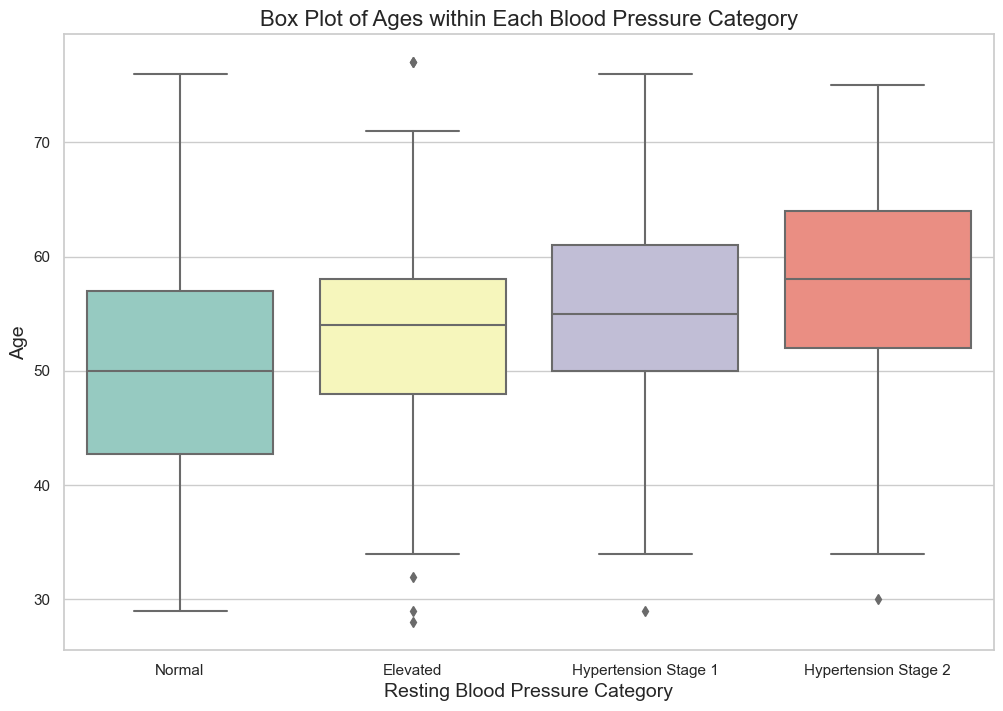

In [29]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Box plot for ages within each blood pressure category
sns.boxplot(x='RestBP_Category', y='Age', data=df, palette='Set3')

# Customize plot labels and title
plt.title('Box Plot of Ages within Each Blood Pressure Category', fontsize=16)
plt.xlabel('Resting Blood Pressure Category', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Display the plot
plt.show()

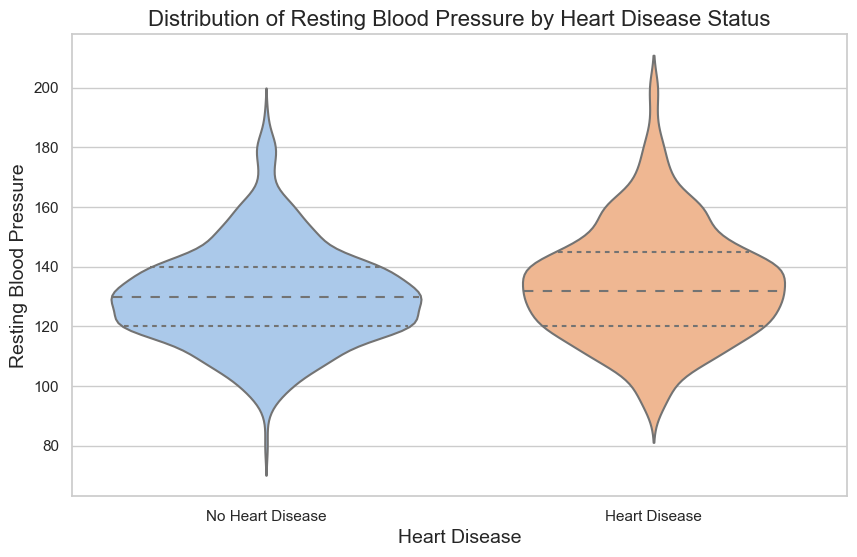

In [30]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Violin plot of Resting Blood Pressure by Heart Disease Status
sns.violinplot(x='HeartDisease', y='RestingBP', data=df, inner='quartile', palette='pastel')

# Customize plot labels and title
plt.title('Distribution of Resting Blood Pressure by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Resting Blood Pressure', fontsize=14)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], rotation=0)

# Display the plot
plt.show()


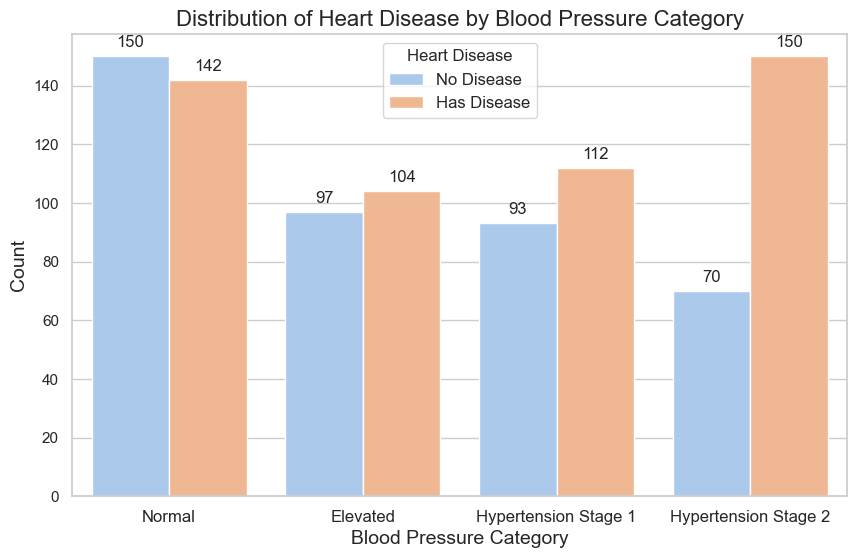

In [31]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='RestBP_Category', hue='HeartDisease', data=df, palette="pastel")

# Add labels and title
ax.set_title('Distribution of Heart Disease by Blood Pressure Category', fontsize=16)
ax.set_xlabel('Blood Pressure Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the tick labels
ax.set_xticklabels(['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2'], fontsize=12)
ax.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'], fontsize=12)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

### 3. Analyzing Cholestrol

In [32]:
# Define the bins and labels for cholesterol categories
bins = [0, 200, 240, float('inf')]
labels = ['Normal', 'Borderline', 'High']

# Create a new column 'CholesterolCategory' with the assigned categories
df['CholesterolCategory'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

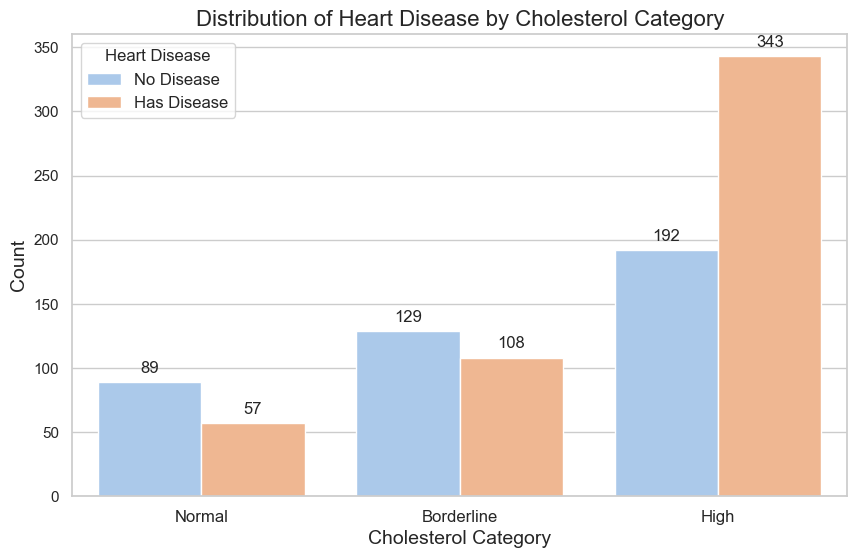

In [33]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CholesterolCategory', hue='HeartDisease', data=df, palette="pastel")

# Add labels and title
ax.set_title('Distribution of Heart Disease by Cholesterol Category', fontsize=16)
ax.set_xlabel('Cholesterol Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the tick labels
ax.set_xticklabels(['Normal', 'Borderline', 'High'], fontsize=12)
ax.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'], fontsize=12)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

### 4. Analyzing Fasting Blood Sugar

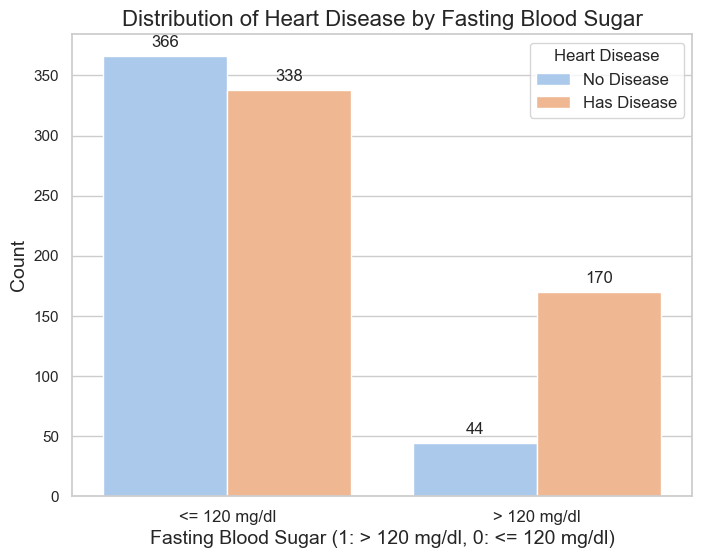

In [34]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette="pastel")

# Add labels and title
ax.set_title('Distribution of Heart Disease by Fasting Blood Sugar', fontsize=16)
ax.set_xlabel('Fasting Blood Sugar (1: > 120 mg/dl, 0: <= 120 mg/dl)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the tick labels
ax.set_xticklabels(['<= 120 mg/dl', '> 120 mg/dl'], fontsize=12)
ax.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'], fontsize=12)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

### 5. Analyzing Maximum Heart Rate

In [35]:
# Adjust the bins and labels for maximum heart rate categories
max_hr_bins = [0, 60, 100, float('inf')]
max_hr_labels = ['Low', 'Normal', 'High']

# Create a new column 'MaxHRCategory' with the adjusted categories
df['MaxHRCategory'] = pd.cut(df['MaxHR'], bins=max_hr_bins, labels=max_hr_labels, right=False)

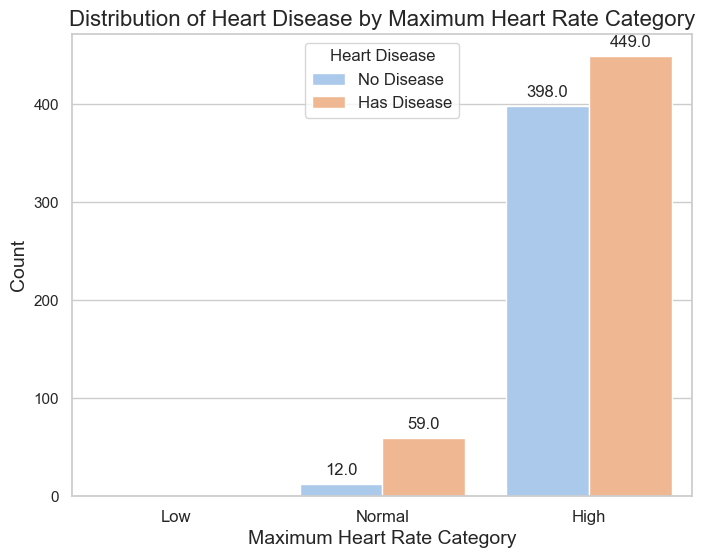

In [36]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='MaxHRCategory', hue='HeartDisease', data=df, palette="pastel")

# Add labels and title
ax.set_title('Distribution of Heart Disease by Maximum Heart Rate Category', fontsize=16)
ax.set_xlabel('Maximum Heart Rate Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the tick labels
ax.set_xticklabels(['Low', 'Normal', 'High'], fontsize=12)
ax.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'], fontsize=12)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

### 6. Analyzing Oldpeak

In [37]:
df['Oldpeaksignificant'] = (df['Oldpeak'] >= 1).astype(int)

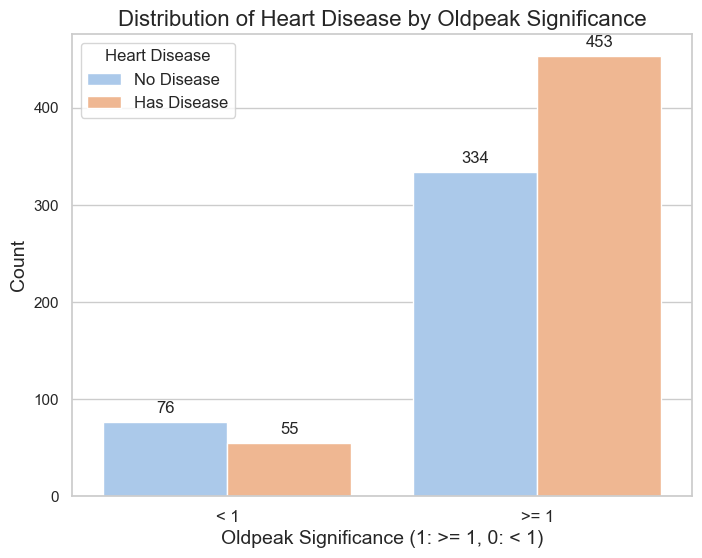

In [38]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Oldpeaksignificant', hue='HeartDisease', data=df, palette="pastel")

# Add labels and title
ax.set_title('Distribution of Heart Disease by Oldpeak Significance', fontsize=16)
ax.set_xlabel('Oldpeak Significance (1: >= 1, 0: < 1)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the tick labels
ax.set_xticklabels(['< 1', '>= 1'], fontsize=12)
ax.legend(title='Heart Disease', labels=['No Disease', 'Has Disease'], fontsize=12)

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

## Analyzing Categorical feature

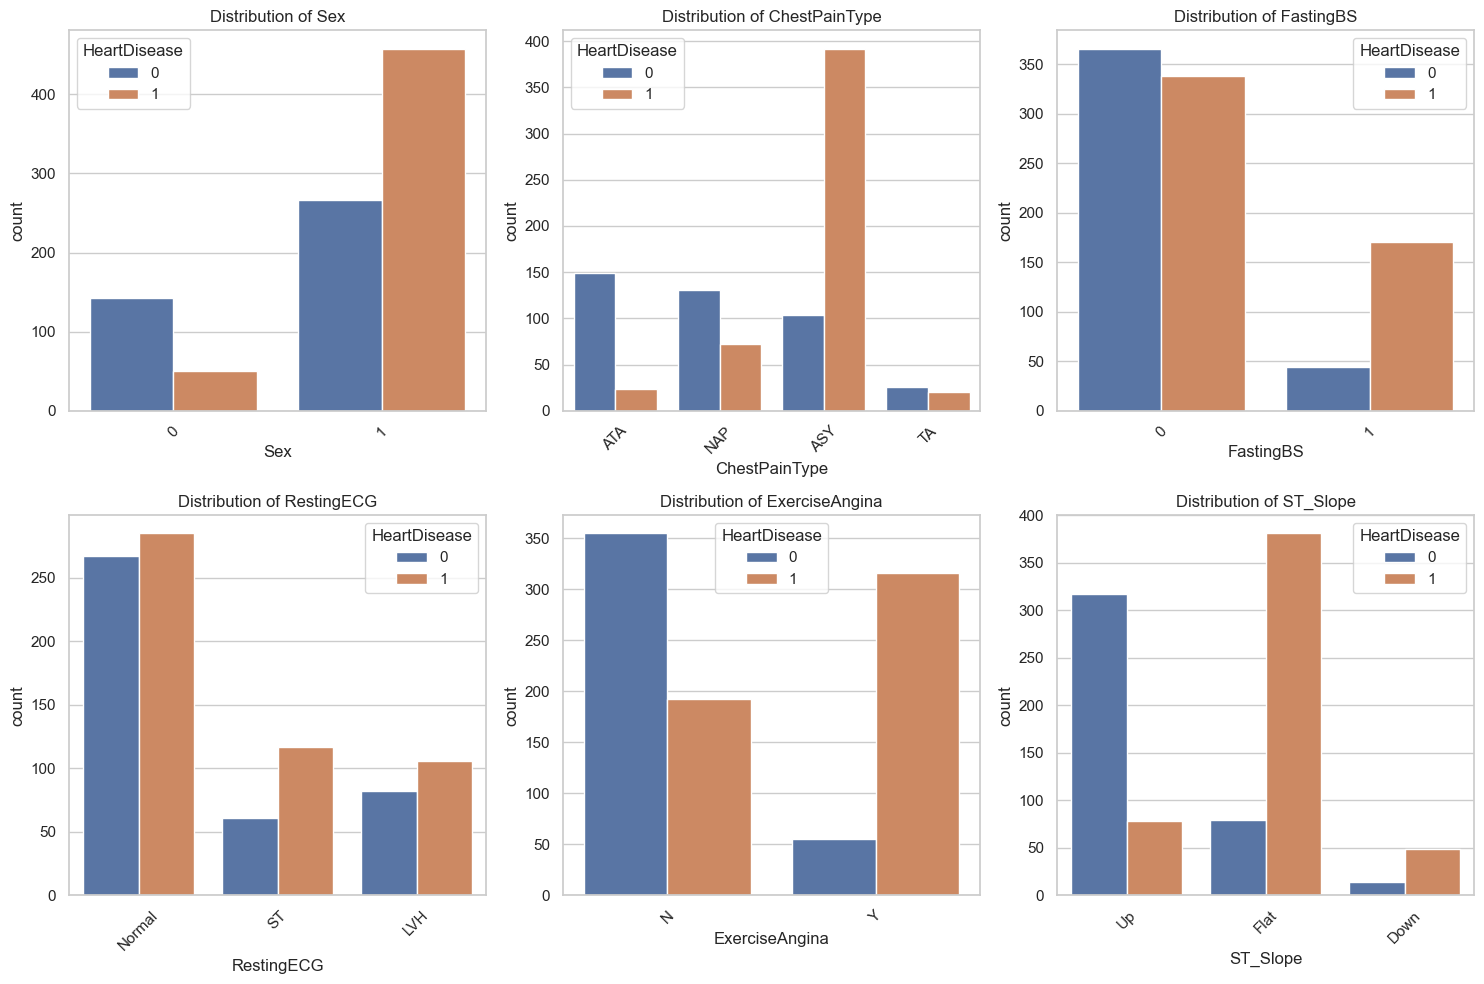

In [39]:
# With df
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Calculate Cramér's V for each categorical feature

In [40]:
# Function to calculate Cramér's V
def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [41]:
# Calculate Cramér's V for each categorical feature
correlation_with_heart_disease = {}
for feature in categorical_features:
    conf_matrix = pd.crosstab(df[feature], df['HeartDisease'])
    correlation = cramers_v(conf_matrix)
    correlation_with_heart_disease[feature] = correlation

# Display the correlation values
correlation_df = pd.DataFrame(list(correlation_with_heart_disease.items()), columns=['Categorical Feature', 'Correlation with HeartDisease'])
correlation_df.sort_values(by='Correlation with HeartDisease', ascending=False, inplace=True)
print(correlation_df)


  Categorical Feature  Correlation with HeartDisease
5            ST_Slope                       0.621249
1       ChestPainType                       0.537639
4      ExerciseAngina                       0.491208
0                 Sex                       0.301114
2           FastingBS                       0.262775
3          RestingECG                       0.098679


#### Perform Chi-square Test for Independence

In [42]:
for feature in categorical_features:
    if feature != 'HeartDisease':  # Avoid testing 'HeartDisease' against itself
        contingency_table = pd.crosstab(df[feature], df['HeartDisease'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        print(f"Chi-square test for independence between {feature} and HeartDisease:")
        print(f"Chi2: {chi2:.2f}, p-value: {p}")
        if p < 0.05:
            print("There is a significant association.")
        else:
            print("No significant association found.")
        print("=" * 40)

Chi-square test for independence between Sex and HeartDisease:
Chi2: 84.15, p-value: 4.5976174508091635e-20
There is a significant association.
Chi-square test for independence between ChestPainType and HeartDisease:
Chi2: 268.07, p-value: 8.08372842808765e-58
There is a significant association.
Chi-square test for independence between FastingBS and HeartDisease:
Chi2: 64.32, p-value: 1.0573018731809955e-15
There is a significant association.
Chi-square test for independence between RestingECG and HeartDisease:
Chi2: 10.93, p-value: 0.0042292328167544925
There is a significant association.
Chi-square test for independence between ExerciseAngina and HeartDisease:
Chi2: 222.26, p-value: 2.907808387659878e-50
There is a significant association.
Chi-square test for independence between ST_Slope and HeartDisease:
Chi2: 355.92, p-value: 5.167637689470128e-78
There is a significant association.


# ML Model

## Without feature selection

In [43]:
# Separate features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [46]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [48]:
# Create models
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(random_state=42))])

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', GradientBoostingClassifier(random_state=42))])

In [49]:
# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
 

In [50]:
# Make predictions
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [51]:
# Evaluate models
models = [('Logistic Regression', logreg_preds),
          ('Random Forest', rf_preds),
          ('Gradient Boosting', gb_preds)]

Metrics for Logistic Regression:
Accuracy: 0.8641304347826086
Confusion Matrix:
 [[67 10]
 [15 92]]


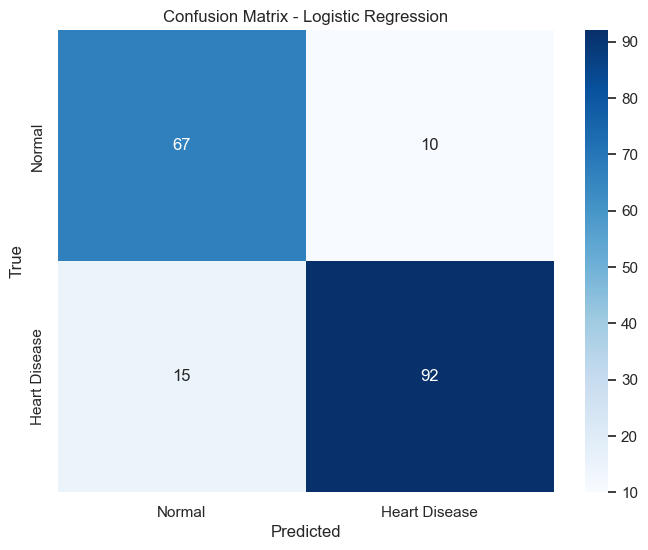

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Metrics for Random Forest:
Accuracy: 0.8695652173913043
Confusion Matrix:
 [[68  9]
 [15 92]]


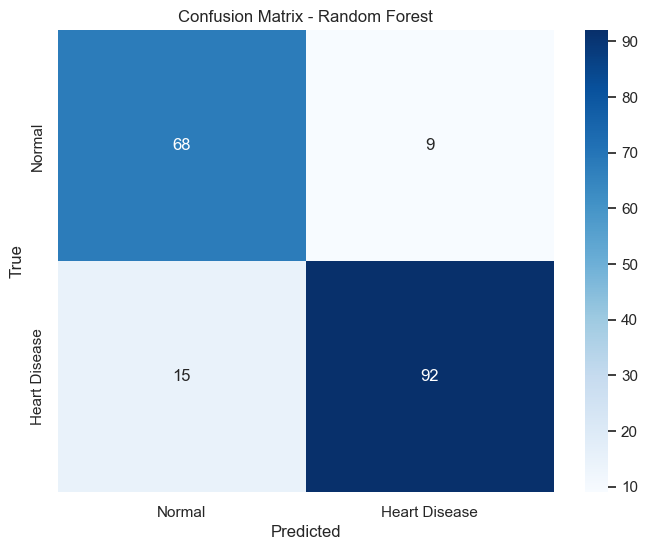

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Metrics for Gradient Boosting:
Accuracy: 0.8586956521739131
Confusion Matrix:
 [[68  9]
 [17 90]]


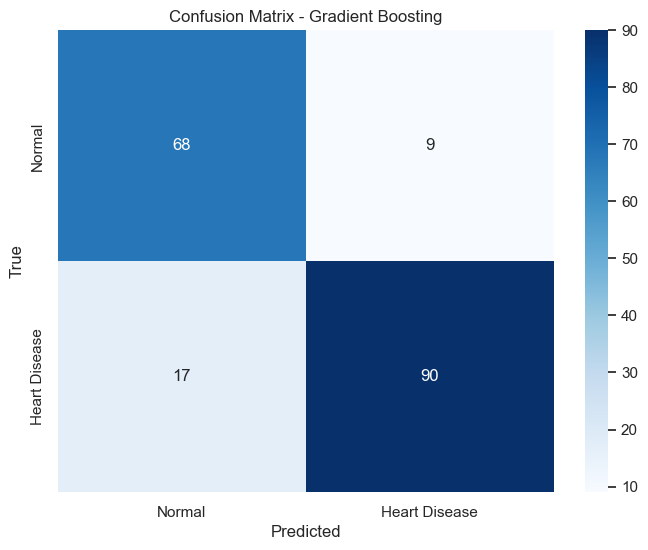

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [52]:
for model_name, predictions in models:
    print(f"Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", conf_mat)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Heart Disease'],
                yticklabels=['Normal', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("="*50)

## With Feature Selection

In [53]:
categorical_variable = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'RestBP_Category', 'CholesterolCategory', 'MaxHRCategory']
numerical_feature = ['Sex', 'FastingBS', 'Oldpeaksignificant']

In [54]:
# Extract features and target variable
X = df[categorical_variable + numerical_feature]
y = df['HeartDisease']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Define preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [57]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_feature),
        ('cat', categorical_transformer, categorical_variable)
    ])

In [58]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

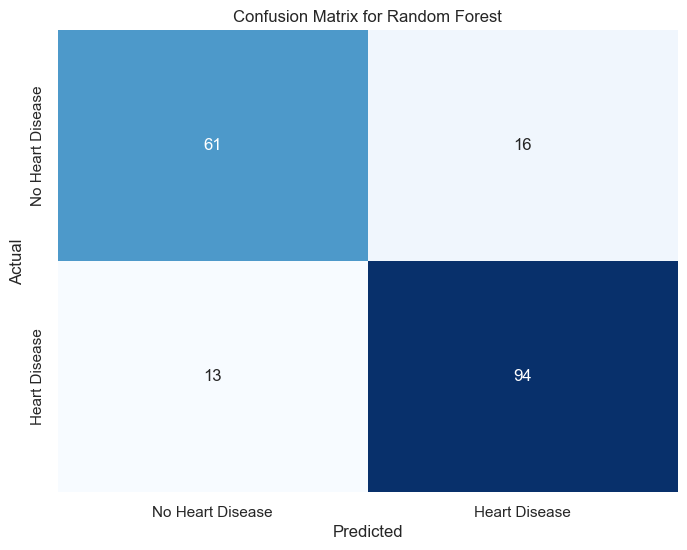

Model: Random Forest
Accuracy: 0.8424
Confusion Matrix:
[[61 16]
 [13 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.85      0.88      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184





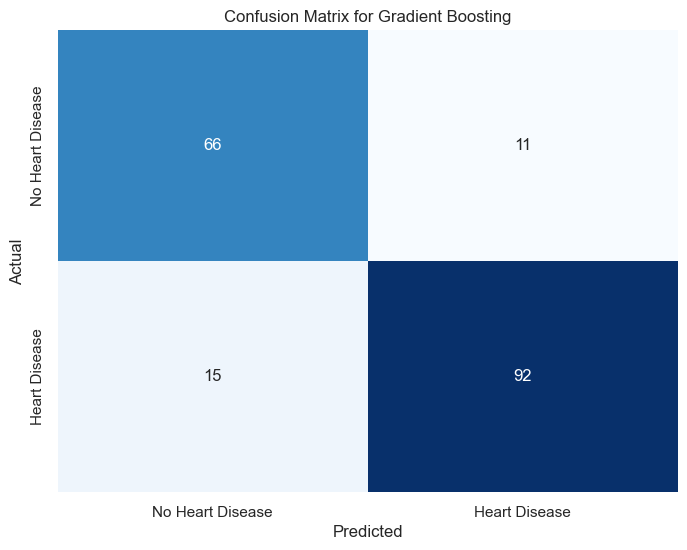

Model: Gradient Boosting
Accuracy: 0.8587
Confusion Matrix:
[[66 11]
 [15 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184





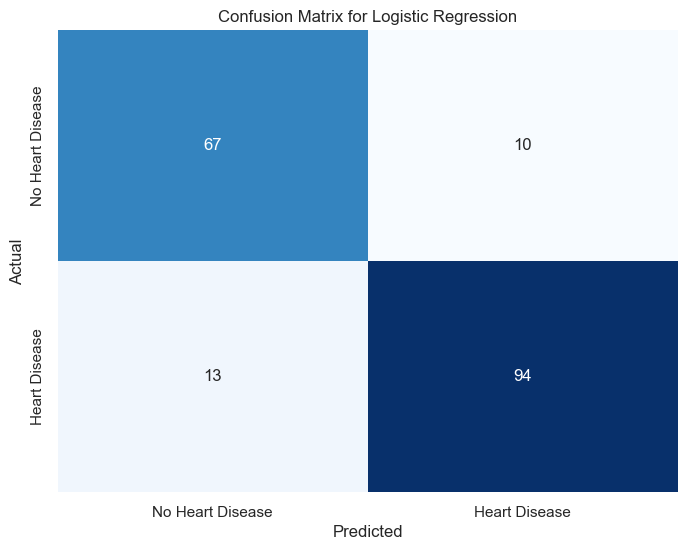

Model: Logistic Regression
Accuracy: 0.8750
Confusion Matrix:
[[67 10]
 [13 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184





In [59]:
# Train and evaluate models
for name, clf in classifiers.items():
    # Create a pipeline with preprocessing and the classifier
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', clf)])
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Create a confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    classification_rep = classification_report(y_test, y_pred)
    # Print results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")
    print("\n")

## With Cross Validation

Model: Random Forest
Cross-Validation Scores: [0.82993197 0.84353741 0.82993197 0.81632653 0.8630137 ]
Mean Cross-Validation Score: 0.8365


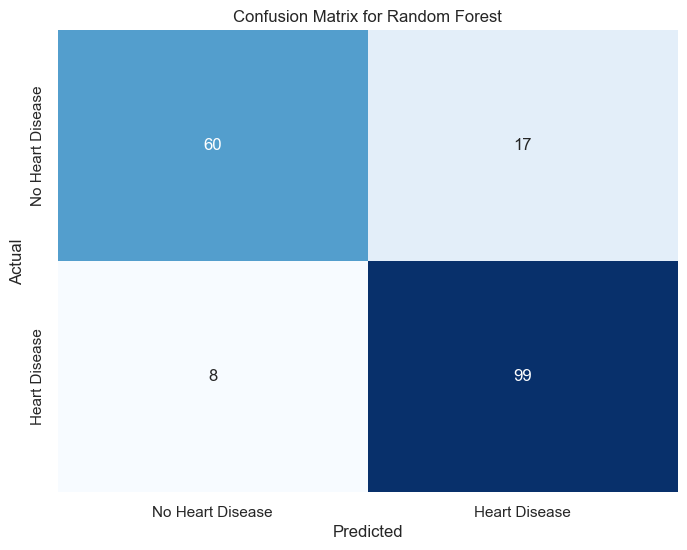

Accuracy: 0.8641
Confusion Matrix:
[[60 17]
 [ 8 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        77
           1       0.85      0.93      0.89       107

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184



Model: Gradient Boosting
Cross-Validation Scores: [0.85034014 0.85034014 0.8707483  0.85034014 0.82876712]
Mean Cross-Validation Score: 0.8501


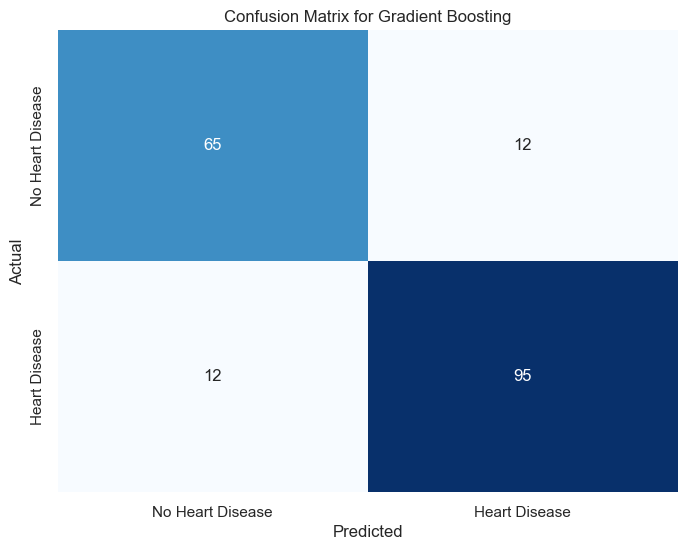

Accuracy: 0.8696
Confusion Matrix:
[[65 12]
 [12 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Model: Logistic Regression
Cross-Validation Scores: [0.87755102 0.85714286 0.8707483  0.85714286 0.84931507]
Mean Cross-Validation Score: 0.8624


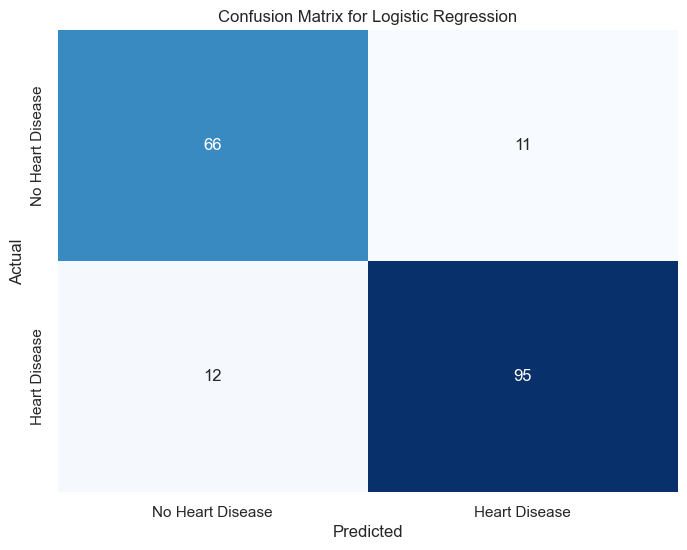

Accuracy: 0.8750
Confusion Matrix:
[[66 11]
 [12 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184





In [60]:
# Train and evaluate models with cross-validation
for name, clf in classifiers.items():
   
    model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', clf)])
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_probs = model.predict_proba(X_test)[:, 1]

    # Choose a threshold that balances recall and precision
    optimal_threshold = 0.4  # Adjust based on your preference

    # Apply the optimal threshold to the predictions
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

    # Evaluate the model with the new threshold
    accuracy = accuracy_score(y_test, y_pred_optimal)
    conf_matrix = confusion_matrix(y_test, y_pred_optimal)
    
    # Print cross-validation scores
    print(f"Model: {name}")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cv_scores):.4f}")
    
    # Create a confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    classification_rep = classification_report(y_test, y_pred_optimal)
    
    # Print results with the new threshold
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")
    print("\n")


# Conclusion
In this project, we conducted an in-depth analysis of cardiovascular risk prediction using machine learning. We employed three supervised ML algorithms—Logistic Regression, Gradient Boosting, and Random Forest—both with and without feature selection. Our findings indicate that implementing models with feature selection significantly improved accuracy and overall performance metrics, as observed through cross-validation. This suggests that identifying and utilizing key features in the dataset plays a crucial role in enhancing the predictive capabilities of the models for cardiovascular risk assessment. This project underscores the importance of thoughtful feature selection in the ML process for cardiovascular disease prediction.
For deployment we will consider Random Forest after feature selection and cross validation as it Recall value is best among any other model. As predicting heart disease could be crucial so we can not afford the error type 2 as it indicates if a person has heart disease and predicted as no heart disease.